In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.patches import Polygon
import numpy as np
from scipy import stats
import seaborn as sns

# Plot horizontal bar plot for Fig. 2a

In [2]:
# Initialize the necessary lists and DataFrames. 
data_df = pd.DataFrame(columns=['model', 'metric', 'score_ft', 'score_wo_ft'])

model_list = []
metric_list = []
score_list = []
score_wo_ft_list = []

metric_array = ['rouge_1_f', 'rouge_2_f', 'rouge_l_f', 'bertscore']

In [3]:
# This reads Llama3 70B GO evaluation

# This is the directory containing the model's evaluation output file WITH finetuning
eval_result_list = pd.read_csv('/data/rli10/gene-set-summary-by-llm-wchen19-main-patch-30666/fig_source/llama3-70b-ft-norephrase.csv')
eval_result_list = eval_result_list.values.tolist()

# This is the directory containing the model's evaluation output file WITHOUT finetuning
eval_result_wo_ft_list = pd.read_csv('/data/rli10/gene-set-summary-by-llm-wchen19-main-patch-30666/fig_source/llama3_70b_mm_1shot_GO_mouse_eval_table_wo_ft.csv')
eval_result_wo_ft_list = eval_result_wo_ft_list.values.tolist()

for i in range(len(eval_result_list)):
    row = eval_result_list[i]
    row_wo_ft = eval_result_wo_ft_list[i]
    for metric_index in [3, 0, 2, 1]:
        model_list.append('Llama3-70b_noRephrase') # Remember to change this to the corresponding model name. 
        metric_list.append(str(metric_array[metric_index]))
        score_list.append(row[metric_index+3])
        score_wo_ft_list.append(row_wo_ft[metric_index+3])


In [4]:
# This reads Llama3 8B GO evaluation

# This is the directory containing the model's evaluation output file WITH finetuning
eval_result_list = pd.read_csv('/data/rli10/gene-set-summary-by-llm-wchen19-main-patch-30666/fig_source/llama3-8b-ft-norephrase.csv')
eval_result_list = eval_result_list.values.tolist()

# This is the directory containing the model's evaluation output file WITHOUT finetuning
eval_result_wo_ft_list = pd.read_csv('/data/rli10/gene-set-summary-by-llm-wchen19-main-patch-30666/fig_source/llama3_8b_mm_1shot_GO_mouse_eval_table_wo_ft.csv')
eval_result_wo_ft_list = eval_result_wo_ft_list.values.tolist()

for i in range(len(eval_result_list)):
    row = eval_result_list[i]
    row_wo_ft = eval_result_wo_ft_list[i]
    for metric_index in [3, 0, 2, 1]:
        model_list.append('Llama3-8b_noRephrase') # Remember to change this to the corresponding model name. 
        metric_list.append(str(metric_array[metric_index]))
        score_list.append(row[metric_index+3])
        score_wo_ft_list.append(row_wo_ft[metric_index+3])


In [5]:
# This reads Mixtral 8*7b GO evaluation

# This is the directory containing the model's evaluation output file WITH finetuning
eval_result_list = pd.read_csv('/data/rli10/gene-set-summary-by-llm-wchen19-main-patch-30666/fig_source/mixtral8_7b_GO_term_prompt4_eval_ft.csv')
eval_result_list = eval_result_list.values.tolist()

# This is the directory containing the model's evaluation output file WITHOUT finetuning
eval_result_wo_ft_list = pd.read_csv('/data/rli10/gene-set-summary-by-llm-wchen19-main-patch-30666/fig_source/mistral_7b_mm_1shot_GO_mouse_eval_table_wo_ft.csv')
eval_result_wo_ft_list = eval_result_wo_ft_list.values.tolist()

for i in range(len(eval_result_list)):
    row = eval_result_list[i]
    row_wo_ft = eval_result_wo_ft_list[i]
    for metric_index in [3, 0, 2, 1]:
        model_list.append('Mixtral-8*7b_noRephrase') # Remember to change this to the corresponding model name. 
        metric_list.append(str(metric_array[metric_index]))
        score_list.append(row[metric_index+2])
        score_wo_ft_list.append(row_wo_ft[metric_index+3])


In [6]:
# This reads Mistral 7b GO evaluation

# This is the directory containing the model's evaluation output file WITH finetuning
eval_result_list = pd.read_csv('/data/rli10/gene-set-summary-by-llm-wchen19-main-patch-30666/fig_source/mistral7b_GO_term_prompt4_eval_ft.csv')
eval_result_list = eval_result_list.values.tolist()

# This is the directory containing the model's evaluation output file WITHOUT finetuning
eval_result_wo_ft_list = pd.read_csv('/data/rli10/gene-set-summary-by-llm-wchen19-main-patch-30666/fig_source/mistral_7b_mm_1shot_GO_mouse_eval_table_wo_ft.csv')
eval_result_wo_ft_list = eval_result_wo_ft_list.values.tolist()

for i in range(len(eval_result_list)):
    row = eval_result_list[i]
    row_wo_ft = eval_result_wo_ft_list[i]
    for metric_index in [3, 0, 2, 1]:
        model_list.append('Mistral-7b_noRephrase') # Remember to change this to the corresponding model name. 
        metric_list.append(str(metric_array[metric_index]))
        score_list.append(row[metric_index+2])
        score_wo_ft_list.append(row_wo_ft[metric_index+3])


In [7]:
# This reads GPT-4 noRephrase evaluation finetune. 

# This is the directory containing the model's evaluation output file WITHOUT finetuning
eval_result_wo_ft_list = pd.read_csv('/data/rli10/gene-set-summary-by-llm-wchen19-main-patch-30666/fig_source/gpt4_goterm_output_geneagent_prompt_lowercase.tsv', delimiter='\t')
#eval_result_wo_ft_list.columns = ['index', 'reference_summary', 'generated_summary', 'rouge_1_f', 'rouge_2_f', 'rouge_l_f', 'bertscore']


eval_result_wo_ft_list = eval_result_wo_ft_list.values.tolist()

for i in range(len(eval_result_wo_ft_list)):
    row_wo_ft = eval_result_wo_ft_list[i]
    for metric_index in [3, 0, 2, 1]:
        model_list.append('GPT-4') # Remember to change this to the corresponding model name. 
        metric_list.append(str(metric_array[metric_index]))
        score_list.append(0) # Since we don't have results for "finetuned GPT-4, we just enter 0 for all"
        score_wo_ft_list.append(float(row_wo_ft[metric_index+2]))


In [8]:
# This reads Llama3 70B rephrase evaluation

# This is the directory containing the model's evaluation output file WITH finetuning
eval_result_list = pd.read_csv('/data/rli10/gene-set-summary-by-llm-wchen19-main-patch-30666/fig_source/llama3_70b_rephrased_withshortdesc_30_50_prompt4_GO_eval-testnew.csv')
eval_result_list = eval_result_list.values.tolist()

# This is the directory containing the model's evaluation output file WITHOUT finetuning
eval_result_wo_ft_list = pd.read_csv('/data/rli10/gene-set-summary-by-llm-wchen19-main-patch-30666/fig_source/llama3_70b_rephrase_pred_eval_wo_ft.csv')
eval_result_wo_ft_list = eval_result_wo_ft_list.values.tolist()

for i in range(len(eval_result_list)):
    row = eval_result_list[i]
    row_wo_ft = eval_result_wo_ft_list[i]
    for metric_index in [3, 0, 2, 1]:
        model_list.append('Llama3-70b_rephrase') # Remember to change this to the corresponding model name. 
        metric_list.append(str(metric_array[metric_index]))
        score_list.append(row[metric_index+3])
        score_wo_ft_list.append(row_wo_ft[metric_index+3])


In [9]:
# This reads Llama3 8B rephrase evaluation finetune

# This is the directory containing the model's evaluation output file WITH finetuning
eval_result_list = pd.read_csv('/data/rli10/geneset_summarization/llama_3_8b_instruct_mouse_rephrase/mm/GPT_instruct_rephrase_mouse_eval_table_w_ft.csv')
eval_result_list = eval_result_list.values.tolist()

# This is the directory containing the model's evaluation output file WITHOUT finetuning
eval_result_wo_ft_list = pd.read_csv('/data/rli10/geneset_summarization/llama_3_8b_instruct_mouse_rephrase/mm/GPT_instruct_rephrase_mouse_eval_table_wo_ft.csv')
eval_result_wo_ft_list = eval_result_wo_ft_list.values.tolist()

for i in range(len(eval_result_list)):
    row = eval_result_list[i]
    row_wo_ft = eval_result_wo_ft_list[i]
    for metric_index in [3, 0, 2, 1]:
        model_list.append('Llama3-8b_rephrase') # Remember to change this to the corresponding model name. 
        metric_list.append(str(metric_array[metric_index]))
        score_list.append(row[metric_index+3])
        score_wo_ft_list.append(row_wo_ft[metric_index+3])


In [10]:
# This reads Mixtral 8*7b rephrase evaluation

# This is the directory containing the model's evaluation output file WITH finetuning
eval_result_list = pd.read_csv('/data/rli10/gene-set-summary-by-llm-wchen19-main-patch-30666/fig_source/mixtral8_7b_GPT_rephrased_prompt4_eval_ft.csv')
eval_result_list = eval_result_list.values.tolist()

# This is the directory containing the model's evaluation output file WITHOUT finetuning
eval_result_wo_ft_list = pd.read_csv('/data/rli10/gene-set-summary-by-llm-wchen19-main-patch-30666/fig_source/mixtral8_7b_GPT_rephrased_prompt4_eval_wo_ft.csv')
eval_result_wo_ft_list = eval_result_wo_ft_list.values.tolist()

for i in range(len(eval_result_list)):
    row = eval_result_list[i]
    row_wo_ft = eval_result_wo_ft_list[i]
    for metric_index in [3, 0, 2, 1]:
        model_list.append('Mixtral-8*7b_rephrase') # Remember to change this to the corresponding model name. 
        metric_list.append(str(metric_array[metric_index]))
        score_list.append(row[metric_index+3])
        score_wo_ft_list.append(row_wo_ft[metric_index+3])


In [11]:
# This reads Mistral 7b rephrase evaluation

# This is the directory containing the model's evaluation output file WITH finetuning
eval_result_list = pd.read_csv('/data/rli10/gene-set-summary-by-llm-wchen19-main-patch-30666/fig_source/mistral7b_GPT_rephrased_prompt4_eval_ft.csv')
eval_result_list = eval_result_list.values.tolist()

# This is the directory containing the model's evaluation output file WITHOUT finetuning
eval_result_wo_ft_list = pd.read_csv('/data/rli10/gene-set-summary-by-llm-wchen19-main-patch-30666/fig_source/mistral7b_GPT_rephrased_prompt4_eval_wo_ft.csv')
eval_result_wo_ft_list = eval_result_wo_ft_list.values.tolist()

for i in range(len(eval_result_list)):
    row = eval_result_list[i]
    row_wo_ft = eval_result_wo_ft_list[i]
    for metric_index in [3, 0, 2, 1]:
        model_list.append('Mistral-7b_rephrase') # Remember to change this to the corresponding model name. 
        metric_list.append(str(metric_array[metric_index]))
        score_list.append(row[metric_index+2])
        score_wo_ft_list.append(row_wo_ft[metric_index+2])


In [12]:
# Make all into one Dataframe
data_df['model'] = model_list
data_df['metric'] = metric_list
data_df['score_ft'] = score_list
data_df['score_wo_ft'] = score_wo_ft_list
data_df

,model,metric,score_ft,score_wo_ft
0,Llama3-70b_noRephrase,bertscore,0.880545,0.912368
1,Llama3-70b_noRephrase,rouge_1_f,0.588235,0.571429
2,Llama3-70b_noRephrase,rouge_l_f,0.588235,0.571429
3,Llama3-70b_noRephrase,rouge_2_f,0.444444,0.166667
4,Llama3-70b_noRephrase,bertscore,0.934817,0.901365
...,...,...,...,...
73191,Mistral-7b_rephrase,rouge_2_f,0.191781,0.000000
73192,Mistral-7b_rephrase,bertscore,0.945864,0.811810
73193,Mistral-7b_rephrase,rouge_1_f,0.633333,0.150943
73194,Mistral-7b_rephrase,rouge_l_f,0.600000,0.113208


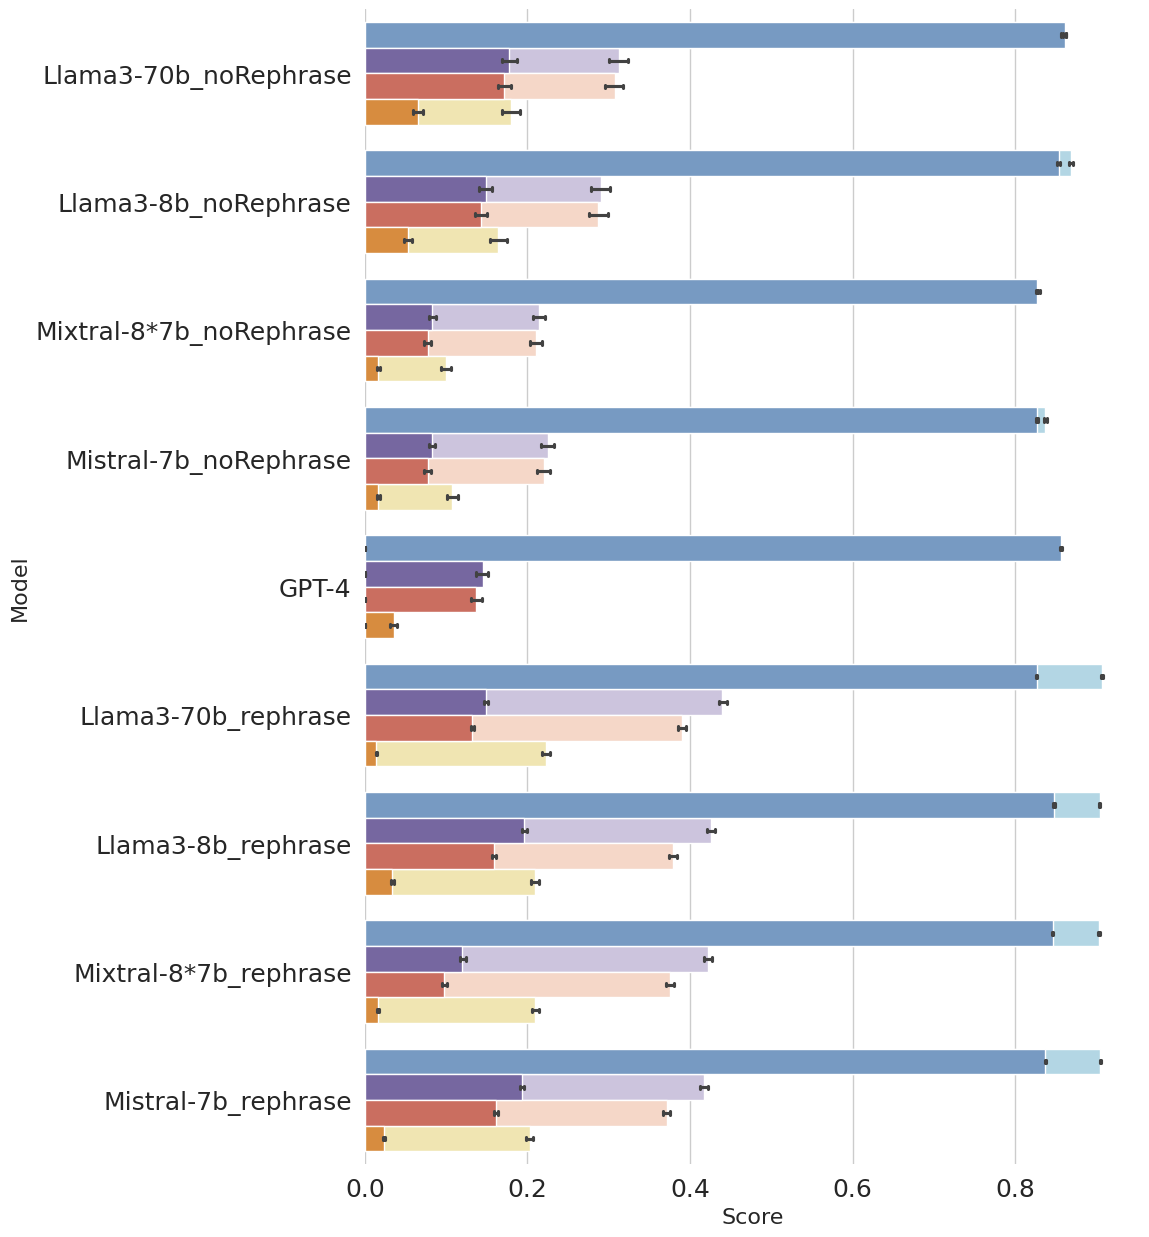

In [13]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 15))

#sns.set(font_scale=3)

ax.set_xlabel('Score', fontsize=16)
ax.set_ylabel('Model', fontsize=16)

plt.tick_params(axis='both', which='major', labelsize=18)

#flatui = ["#9b59b6", "#3498db", "orange"]
flatui = ['#abdaec', '#cac0e1', '#fdd5c0', '#faeca8']
#flatui = sns.color_palette("ch:start=.2,rot=-.3")
sns.set_palette(flatui)

#sns.set_color_codes("pastel")
sns.barplot(x='score_ft', y="model", hue='metric', data=data_df, capsize=.1)

# Plot the crashes where alcohol was involved

#flatui = sns.color_palette("ch:s=-.2,r=.6")
flatui = ['#6a9ace', '#715ea9', '#db614f', '#f18c25']
sns.set_palette(flatui)

#sns.set_color_codes("muted")
sns.barplot(x="score_wo_ft", y="model", hue='metric', data=data_df, capsize=.1)

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.get_legend().set_visible(False)

sns.despine(left=True, bottom=True)

## To plot the paired violin plot for Fig. 2b.
 

In [14]:
cv_result_df = pd.DataFrame(columns=['Fold', 'Species', 'Metric', 'Score'])
metric = 'rouge_1_f' # Change this string between 4 metric field names to change metric comparison shown.

mm_fold_list = []
mm_species_list = []
mm_metric_list = []
mm_score_list = []
for i in range(5):
    fold_key = 'fold'+str(i)
    # Change the file path to where you stored your 5-fold evaluation results. Note that this is in a for-loop. 
    result_df = pd.read_csv('/data/rli10/gene-set-summary-by-llm-wchen19-main-patch-30666/mm_test_eval_result_exam_fold'+str(i)+'.tsv', delimiter='\t')
    for j, row in result_df.iterrows():
        mm_fold_list.append('fold'+str(i))
        mm_species_list.append('Mouse')
        mm_metric_list.append(metric)
        mm_score_list.append(row[metric])

In [15]:
hs_fold_list = []
hs_species_list = []
hs_metric_list = []
hs_score_list = []
for i in range(5):
    fold_key = 'fold'+str(i)
    result_df = pd.read_csv('/data/rli10/gene-set-summary-by-llm-wchen19-main-patch-30666/hs_eval_fold'+str(i)+'_details.csv')
    for j, row in result_df.iterrows():
        hs_fold_list.append('fold'+str(i))
        hs_species_list.append('Human')
        hs_metric_list.append(metric)
        hs_score_list.append(row[metric])

cv_result_df['Fold'] = mm_fold_list+hs_fold_list
cv_result_df['Species'] = mm_species_list+hs_species_list
cv_result_df['Metric'] = mm_metric_list+hs_metric_list
cv_result_df['Score'] = mm_score_list+hs_score_list

In [16]:
cv_result_df

,Fold,Species,Metric,Score
0,fold0,Mouse,rouge_1_f,0.481481
1,fold0,Mouse,rouge_1_f,0.327273
2,fold0,Mouse,rouge_1_f,0.526316
3,fold0,Mouse,rouge_1_f,0.777778
4,fold0,Mouse,rouge_1_f,0.431373
...,...,...,...,...
19942,fold4,Human,rouge_1_f,0.369231
19943,fold4,Human,rouge_1_f,0.448980
19944,fold4,Human,rouge_1_f,0.387097
19945,fold4,Human,rouge_1_f,0.320000


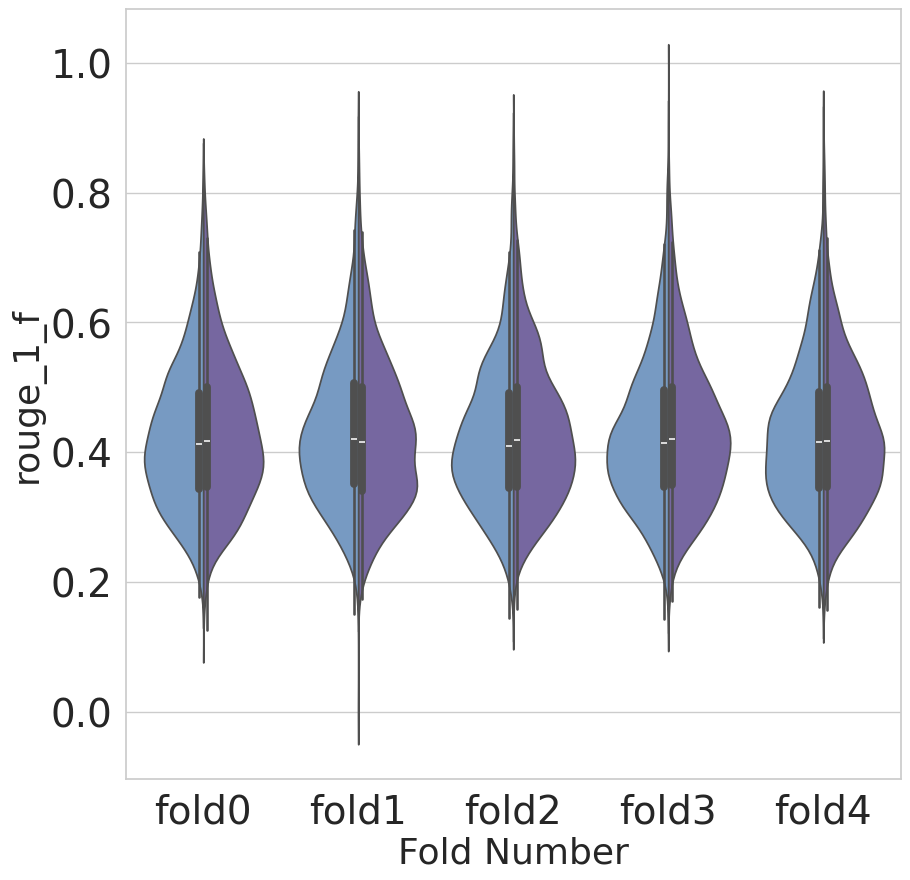

In [17]:
# Violin plot
fig, ax1 = plt.subplots(figsize=(10, 10))

flatui = ['#6a9ace', '#715ea9', '#db614f', '#f18c25']
sns.set_palette(flatui)

ax1.set_xlabel('Fold Number', fontsize=26)
ax1.set_ylabel(metric, fontsize=26)

plt.tick_params(axis='both', which='major', labelsize=28)

sns.violinplot(data=cv_result_df, x="Fold", y="Score", hue="Species", split=True)
ax1.get_legend().set_visible(False)

### Save the plot

In [37]:
fig.savefig("fig_2b.pdf", bbox_inches = "tight")

# Compose detailed table showing geneset and prediction and scores (Like Dr. Zheng asked)

Columns: Genes in the gene set, grand truth description, predicted description, original GO term, input Prompt for prediction, ruge-1, 2, 3 scores, BERT score.

This is not related to plotting. 

In [2]:
#rephrase = pd.read_csv('gpt_training_bio-main/llama2_ft/trl/train_test_data/rephrased_rationale_mm.csv', header=None)
rephrase = pd.read_csv('/data/rli10/gene-set-summary-by-llm-wchen19-main-patch-30666/gpt_training_bio-main/llama2_ft/trl/train_test_data/rephrased_rationale_mm.csv', header=None)
geneset_dic = dict(zip(rephrase[1], rephrase[2]))
#genelis = pd.read_csv('gpt_training_bio-main/llama2_ft/trl/train_test_data/mm_gene_set_gene_symbol.csv')
genelis = pd.read_csv('/data/rli10/gene-set-summary-by-llm-wchen19-main-patch-30666/gpt_training_bio-main/llama2_ft/trl/train_test_data/mm_gene_set_gene_symbol.csv')
genelis_dic = {}
ids, genes = [], []
for key, group in genelis.groupby(by = 'gene_set_id')['symbol']:
    ids.append(key)
    genes.append(', '.join(group.values.tolist()))
    if len(group) <= 500:
        genelis_dic[key] = group.values.tolist()
genelis_df = pd.DataFrame({'gene_set_id': ids, 'gene_list': genes})
overlap_index = list(set(geneset_dic.keys()) & set(genelis_dic.keys()))
print(len(overlap_index))

10278


In [4]:
df = pd.read_csv('/data/rli10/gene-set-summary-by-llm-wchen19-main-patch-30666/mouse/mouse_gene_set_details.csv')

In [30]:
# If getting the test set, no need to do this 
fold_num = 4
# This is for hold-out test
#split_index_df = pd.read_csv('/data/rli10/gene-set-summary-by-llm-wchen19-main-patch-30666/mouse/hold-out-test.txt', header=None, delimiter='\t') # holdout
#split_index_df.columns=['index'] # This is for hold-out test
#train_index = list(split_index_df['index'])
#test_index = list(split_index_df['index'])

# This is for NOT hold-out test (5 fold CV)
split_index_df = pd.read_csv('/data/rli10/gene-set-summary-by-llm-wchen19-main-patch-30666/mouse/split_fold_'+str(fold_num)+'.txt', header=None, delimiter='\t') # not hold out
split_index_df.columns=['index', 'split'] 
train_index = list(split_index_df[split_index_df['split'] == 'Train']['index'])
test_index = list(split_index_df[split_index_df['split'] == 'Test']['index'])

split_index_df.head()

,index,split
0,963,Train
1,965,Train
2,966,Train
3,968,Train
4,969,Train


In [7]:
test_index = []
with open('test_set_index.txt', 'r') as file:
    lines = file.readlines()
    for line in lines:
        test_index.append(int(line))
len(test_index)

2056

In [9]:
# This is for hold out
#input_json = data = pd.read_json('gpt_training_bio-main/llama2_ft/trl/train_test_data/mm/GPT_rephrased_mouse_holdout_test_GO.json', lines=True)
#predictions = pd.read_csv('/data/rli10/geneset_summarization/llama_3_8b_instruct_mouse_fold'+str(fold_num)+'/mm/GPT_rephrased_mouse_fold'+str(fold_num)+'_holdout_GO_eval_table_wo_ft.csv')

# This is for NOT hold out (5 fold CV)
#input_json = data = pd.read_json('gpt_training_bio-main/llama2_ft/trl/train_test_data/mm/GPT_rephrased_mouse_fold'+str(fold_num)+'_test_GO.json', lines=True)
#predictions = pd.read_csv('/data/rli10/geneset_summarization/llama_3_8b_instruct_mouse_fold'+str(fold_num)+'/mm/GPT_rephrased_mouse_fold'+str(fold_num)+'_GO_eval_table_wo_ft.csv')

# This is for the test set
input_json = data = pd.read_json('gpt_training_bio-main/llama2_ft/trl/train_test_data/mm/GPT_instruct_rephrase_mouse_test.json', lines=True)
predictions = pd.read_csv('/data/rli10/geneset_summarization/llama_3_8b_instruct_mouse_rephrase/mm/GPT_instruct_rephrase_mouse_eval_table_w_ft.csv')

In [10]:
i = 0
final_array = []
for index in test_index:
    out_index = i
    detailed_index = index
    current_gene_list = df[df['gene_set_id'] == index]['genelist'].iloc[0] #genelis_dic[index]
    ground_truth_des = predictions.loc[i]['reference_summ']
    predicted_des = predictions.loc[i]['generated_summ']
    go_term = df[df['gene_set_id'] == index]['GO_term'].iloc[0]
    input_prompt = input_json.loc[i]['input'][1]['content']
    rouge_1 = predictions.loc[i]['rouge_1_f']
    rouge_2 = predictions.loc[i]['rouge_2_f']
    rouge_l = predictions.loc[i]['rouge_l_f']
    bert = predictions.loc[i]['bertscore']
    
    final_array.append([out_index, detailed_index, current_gene_list, ground_truth_des, predicted_des, go_term, input_prompt, rouge_1, rouge_2, rouge_l, bert])
    i += 1

final_table_df = pd.DataFrame(final_array, columns=['index', 'geneset_index', 'genelist', 'true_description', 'predicted_description', 'go_term', 'input_prompt', 'rouge_1_f', 'rouge_2_f', 'rouge_l_f', 'bert_score'])
final_table_df.head()

,index,geneset_index,genelist,true_description,predicted_description,go_term,input_prompt,rouge_1_f,rouge_2_f,rouge_l_f,bert_score
0,0,11493,"['Nthl1', 'Ogg1', 'Polb', 'Alkbh1', 'Neil3', '...",This process involves the enzymatic repair of ...,This process involves the recognition and remo...,class I DNA-(apurinic or apyrimidinic site) en...,Propose a brief description for the most promi...,0.333333,0.095238,0.300000,0.861302
1,1,3269,"['Cstdc5', 'Cstdc6', 'Krt83', 'Numa1', 'Krt72'...",This process involves the complex interplay of...,This process involves the intricate coordinati...,keratinocyte differentiation,Propose a brief description for the most promi...,0.317460,0.109589,0.253968,0.897384
2,2,9367,"['Timm10b', 'Timm13', 'Timm9', 'Timm8a1', 'Tim...",This process involves the coordinated activity...,This process involves the assembly and functio...,mitochondrial intermembrane space protein tran...,Propose a brief description for the most promi...,0.480000,0.178571,0.440000,0.881813
3,3,8691,"['Cyp27b1', 'Fgfr1', 'Fgfr4', 'Gnas', 'Vdr']",This process involves the modulation of hormon...,This process involves the enhancement of bone ...,regulation of parathyroid hormone secretion,Propose a brief description for the most promi...,0.620690,0.349206,0.551724,0.940958
4,4,5854,"['Tmed10-ps', 'Kifc1', 'Exoc8', 'Fbxw11', 'Dnm...",This process involves the precise positioning ...,This process involves the coordinated action o...,vesicle localization,Propose a brief description for the most promi...,0.333333,0.129032,0.259259,0.886752


In [33]:
final_table_df.to_csv('mm_test_eval_result_exam_fold'+str(fold_num)+'.tsv', sep='\t', index=False)

# Plot bar plot for reactome results

This is for Fig 2d. For this, we need the Llama3 8B evaluation on the Human reactome dataset. 

In [41]:
data_df = pd.DataFrame(columns=['model', 'species', 'rouge_1_f', 'rouge_2_f', 'rouge_l_f', 'bertscore'])

model_list = []
species_list = []
rouge_1_list = []
rouge_2_list = []
rouge_l_list = []
bert_list = []

,model,species,rouge_1_f,rouge_2_f,rouge_l_f,bertscore
0,Llama3-70b-ft,Human,0.4131,0.1950,0.3574,0.8978
1,Llama3-8b-ft,Human,0.4099,0.1933,0.3586,0.8980
2,GPT-testing,Human,0.2823,0.0687,0.2311,0.8727
3,Llama3-70b-ft,Mouse,0.4222,0.2020,0.3661,0.8996
4,Llama3-8b-ft,Mouse,0.4130,0.1959,0.3603,0.8984
5,GPT-testing,Mouse,0.2856,0.0694,0.2340,0.8739


In [ ]:
# This loads GPT-4 reactome results

species = 'mm'

reactome_eval_result = pd.read_csv('fig_2d_data/'+species+'_GPT4_reactome_eval_table.csv', header=None)
reactome_eval_result.columns = ['index', 'reference_summary', 'generated_summary', 'rouge_1_f', 'rouge_2_f', 'rouge_l_f', 'bertscore']
reactome_eval_result = reactome_eval_result.values.tolist()
for row in reactome_eval_result:
    model_list.append('GPT-4')
    species_list.append('Mouse')
    rouge_1_list.append(row[3])
    rouge_2_list.append(row[4])
    rouge_l_list.append(row[5])
    bert_list.append(row[6])

species = 'hs'

reactome_eval_result = pd.read_csv('fig_2d_data/'+species+'_GPT4_reactome_eval_table.csv', header=None)
reactome_eval_result.columns = ['index', 'reference_summary', 'generated_summary', 'rouge_1_f', 'rouge_2_f', 'rouge_l_f', 'bertscore']
reactome_eval_result = reactome_eval_result.values.tolist()
for row in reactome_eval_result:
    model_list.append('GPT-4')
    species_list.append('Human')
    rouge_1_list.append(row[3])
    rouge_2_list.append(row[4])
    rouge_l_list.append(row[5])
    bert_list.append(row[6])

In [ ]:
# This loads Llama3 70B reactome results

species = 'mm'

reactome_eval_result = pd.read_csv('fig_2d_data/llama3_70b_'+species+'_reactome_eval_w_ft.csv')
reactome_eval_result = reactome_eval_result.values.tolist()
for row in reactome_eval_result:
    model_list.append('Llama3-70b-ft')
    species_list.append('Mouse')
    rouge_1_list.append(row[3])
    rouge_2_list.append(row[4])
    rouge_l_list.append(row[5])
    bert_list.append(row[6])

species = 'hs'

reactome_eval_result = pd.read_csv('fig_2d_data/llama3_70b_'+species+'_reactome_eval_w_ft.csv')
reactome_eval_result = reactome_eval_result.values.tolist()
for row in reactome_eval_result:
    model_list.append('Llama3-70b-ft')
    species_list.append('Human')
    rouge_1_list.append(row[3])
    rouge_2_list.append(row[4])
    rouge_l_list.append(row[5])
    bert_list.append(row[6])

In [ ]:
# This loads Llama3 70B reactome results

species = 'mm'

reactome_eval_result = pd.read_csv('fig_2d_data/llama3_70b_'+species+'_reactome_eval_w_ft.csv')
reactome_eval_result = reactome_eval_result.values.tolist()
for row in reactome_eval_result:
    model_list.append('Llama3-70b-ft')
    species_list.append('Mouse')
    rouge_1_list.append(row[3])
    rouge_2_list.append(row[4])
    rouge_l_list.append(row[5])
    bert_list.append(row[6])

species = 'hs'

reactome_eval_result = pd.read_csv('*Directory for Llama3 70B rephrased evaluation WITH finetuning*') # Change this to your directory of llama3 8b reactome human evaluation results
reactome_eval_result = reactome_eval_result.values.tolist()
for row in reactome_eval_result:
    model_list.append('Llama3-70b-ft')
    species_list.append('Human')
    rouge_1_list.append(row[3])
    rouge_2_list.append(row[4])
    rouge_l_list.append(row[5])
    bert_list.append(row[6])

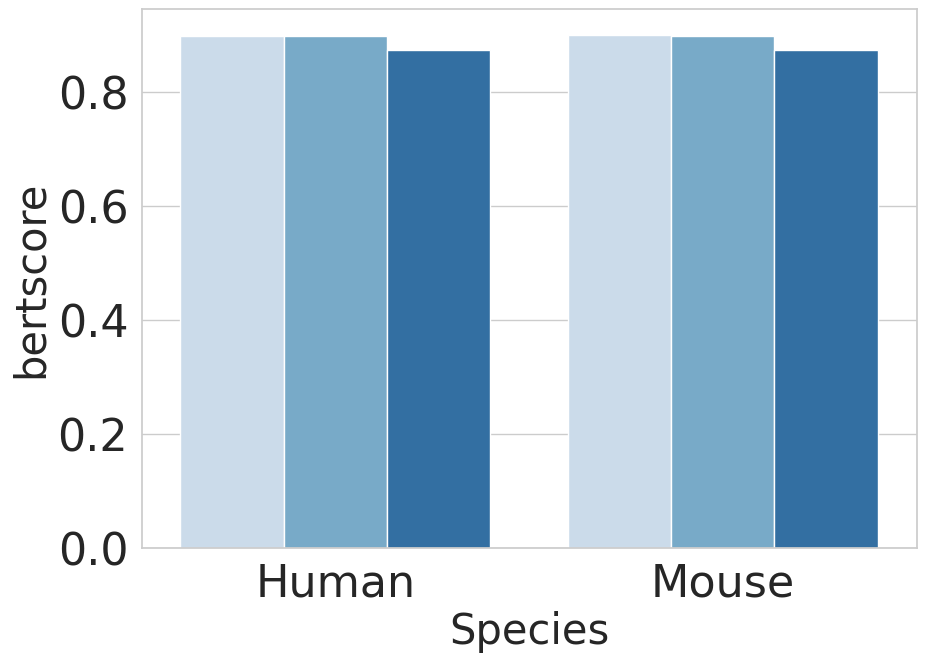

In [50]:
metric = 'rouge_1_f' # Change this to change metrics to view. Go through [rouge_1_f, rouge_2_f, rouge_l_f, bertscore]

fig, ax1 = plt.subplots(figsize=(10,7))

ax1.set_xlabel('Species', fontsize=30)
ax1.set_ylabel(metric, fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=32)


sns.barplot(x = 'species',
            y = metric,
            hue = 'model',
            data = data_df,
            palette = "Blues")
ax1.get_legend().set_visible(False)
# Show the plot
plt.show()

### Save the plot

In [51]:
fig.savefig("fig_2d_rouge1.pdf", bbox_inches = "tight") # Besure to change the save file name so they reflex the metric

# Plot line graph for the reduced sample size results

This is for Fig 2e. This is already done. 

In [63]:
reduced_result_df = pd.DataFrame(columns=['sample_size', 'metric', 'score'])

reduced_size_list = []
reduced_metric_list = []
reduced_score_list = []

metric_array = ['rouge_1_f', 'rouge_2_f', 'rouge_l_f']

for fraction in [1, 2, 3, 4]:
    #eval_result_list = []

    eval_result_list = pd.read_csv('fig_2e_data/llama3_8b_'+str(fraction)+'of4_rephrase_mouse_eval_table_w_ft.csv')
    eval_result_list = eval_result_list.values.tolist()
    for row in eval_result_list:
        for metric_index in range(len(metric_array)):
            reduced_size_list.append(str(fraction)+'/4')
            reduced_metric_list.append(metric_array[metric_index])
            reduced_score_list.append(row[metric_index+3])


reduced_result_df['sample_size'] = reduced_size_list
reduced_result_df['metric'] = reduced_metric_list
reduced_result_df['score'] = reduced_score_list
reduced_result_df
    

,sample_size,metric,score
0,1/4,rouge_1_f,0.3765
1,2/4,rouge_1_f,0.3812
2,3/4,rouge_1_f,0.4014
3,4/4,rouge_1_f,0.4296
4,1/4,rouge_2_f,0.1710
5,2/4,rouge_2_f,0.1779
6,3/4,rouge_2_f,0.1904
7,4/4,rouge_2_f,0.2133
8,1/4,rouge_l_f,0.3372
9,2/4,rouge_l_f,0.3430


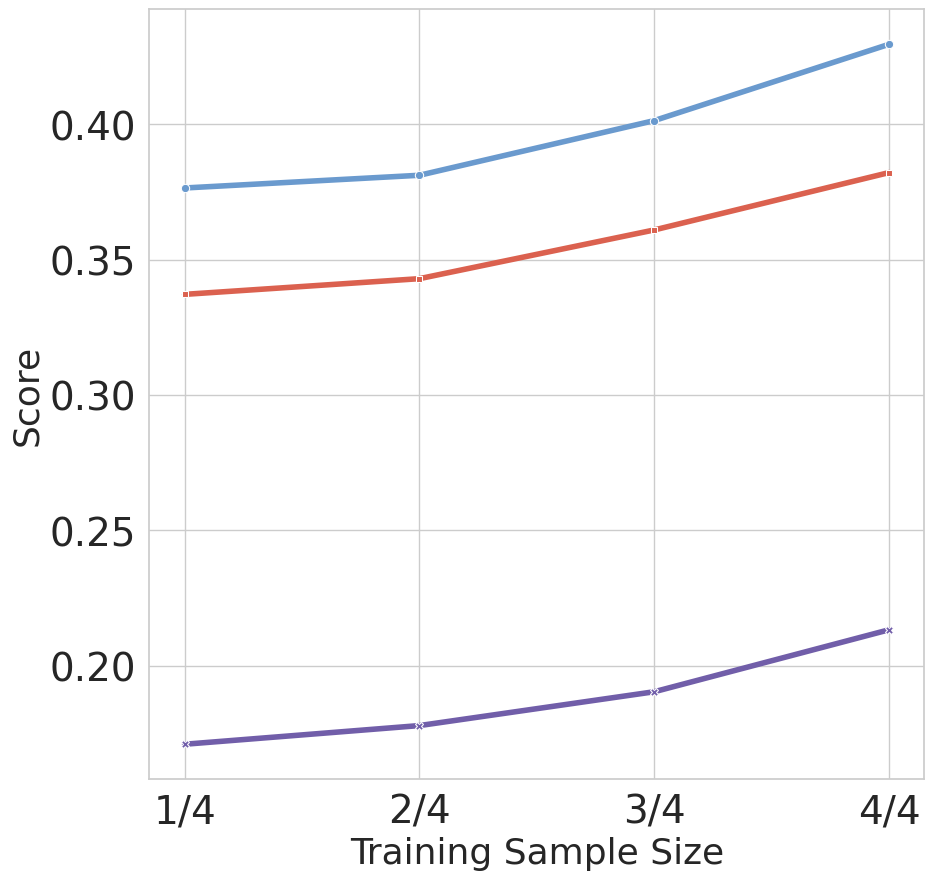

In [72]:
fig, ax1 = plt.subplots(figsize=(10, 10))

flatui = ['#715ea9', '#f18c25', '#db614f']
sns.set_palette(flatui)

ax1.set_xlabel('Training Sample Size', fontsize=30)
ax1.set_ylabel('Score', fontsize=30)

plt.tick_params(axis='both', which='major', labelsize=32)

sns.lineplot(
    data=reduced_result_df,
    x="sample_size", y="score", hue="metric", style="metric",
    markers=True, dashes=False, linewidth=4, err_style="bars", 
)

ax1.get_legend().set_visible(False)

### To save figure

In [73]:
fig.savefig("fig_2e1.pdf", bbox_inches = "tight")

In [74]:
reduced_result_df = pd.DataFrame(columns=['sample_size', 'metric', 'score'])

reduced_size_list = []
reduced_metric_list = []
reduced_score_list = []

metric_array = ['bertscore']

for fraction in [1, 2, 3, 4]:
    #eval_result_list = []

    eval_result_list = pd.read_csv('fig_2e_data/llama3_8b_'+str(fraction)+'of4_rephrase_mouse_eval_table_w_ft.csv')
    eval_result_list = eval_result_list.values.tolist()
    for row in eval_result_list:
        for metric_index in range(len(metric_array)):
            reduced_size_list.append(str(fraction)+'/4')
            reduced_metric_list.append(metric_array[metric_index])
            reduced_score_list.append(row[metric_index+6])


reduced_result_df['sample_size'] = reduced_size_list
reduced_result_df['metric'] = reduced_metric_list
reduced_result_df['score'] = reduced_score_list
reduced_result_df
    

,sample_size,metric,score
0,1/4,bertscore,0.8898
1,2/4,bertscore,0.8915
2,3/4,bertscore,0.8970
3,4/4,bertscore,0.9051


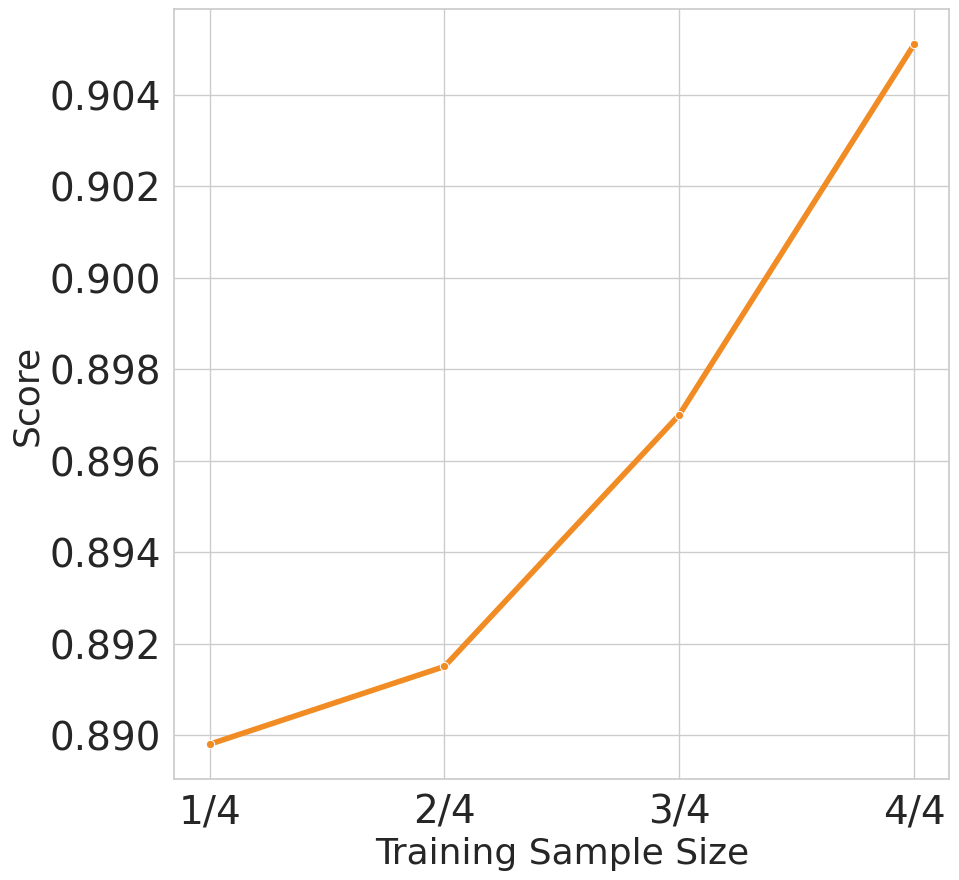

In [75]:
fig, ax1 = plt.subplots(figsize=(10, 10))

ax1.set_xlabel('Training Sample Size', fontsize=30)
ax1.set_ylabel('Score', fontsize=30)

plt.tick_params(axis='both', which='major', labelsize=32)



sns.lineplot(
    data=reduced_result_df,
    x="sample_size", y="score", hue="metric", style="metric",
    markers=True, dashes=False, palette=['#6a9ace'], linewidth=4, err_style="bars",
)

ax1.get_legend().set_visible(False)

### To save figure

In [76]:
fig.savefig("fig_2e2.pdf", bbox_inches = "tight")